## Logistic Regression

Steps:
    1. Load Dataset
    2. Make dataset Iterable
    3. Create Model Class
    4. Instantiate Model Class
    5. Instantiate Loss Class
    6. Instantiate Optimizer Class
    7. Train!

In [85]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [86]:
train_dataset = dsets.MNIST(root='./mnist',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [87]:
len(train_dataset)

60000

In [88]:
train_dataset[1]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1490
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0275  0.6980
   

In [89]:
type(train_dataset[0])

tuple

In [90]:
#input
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [91]:
#label
train_dataset[0][1]

5

### Display MNIST

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [93]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [94]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

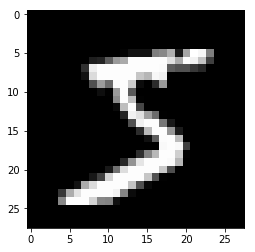

In [95]:
plt.imshow(show_img, cmap ='gray')

### Load test data

In [96]:
test_dataset = dsets.MNIST(root='./mnist',
                          train=False,
                          transform=transforms.ToTensor())

In [97]:
print(len(test_dataset))
type(test_dataset)

10000


torchvision.datasets.mnist.MNIST

7

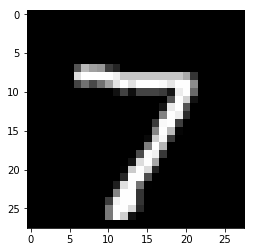

In [104]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap ='gray')
test_dataset[0][1]

## 2 .Make dataset Iterable
- total = 60000
- minibatch = 100 (num of eg in one iteration)
- iterations: 3000
- epoch
    - epochs = iterations/ (total/minibatch)
    -          3000/ (60000/10) = 5

In [105]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

#### Create iterable object: 

In [106]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [107]:
#check iterability
import collections
isinstance(train_loader, collections.Iterable)

True

In [108]:
### Iterate
# example: whats iteration
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


## 3. Build Model

In [109]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        #here input_dim= x, output_dim= y
        
    def forward(self, x):
        out = self.linear(x)
        return out

## 4. Instantiate model class
- Input dimension:
    - Size of image
    - 28 x 28 = 784
- Output Dimension: 10
    - 0,1,2,3,4,5,6,7,8,9

In [110]:
#Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [111]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

## 5. Instantiate Loss Class
- Logistic Regression: Cross Entropy Loss
    - Linear regression: MSE

In [112]:
criterion = nn.CrossEntropyLoss()

#### Whats in nn.CrossEntropyLoss()
 - Automatically computers softmax(logistic/softmax function)
 - Computes cross entropy

## 6. Instantiate Optimizer Class 
- Simplified equation
    - \begin{equation*}
       \theta = \theta - \eta . \nabla_\theta
       \end{equation*}
        - θ : parameters (our variables)
        - η : Learning rate
        - \begin{align}
        \nabla_\theta : \text{Parameters gradients}
          \end{align}
          
- Even Simpler equation
    - ``parameters = parameters - learning_rate * parameters_gradients``
    - #### At every iteration, update model's parameter

In [113]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 7. Train Model

In [114]:
iter = 0 
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #Load images as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        #Clear gradient wrt params
        optimizer.zero_grad()

        #forward pass to get output
        outputs = model(images)

        #calculate loss
        loss = criterion(outputs, labels)

        #Get gradients wrt params
        loss.backward()

        #update params
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            #calcuate accuracy
            correct = 0
            total = 0
            
            #iterate trough test dset
            for images, labels in test_loader:
                #load images to torch variable
                images = Variable(images.view(-1, 28*28))
                
                #Forward pass only to get logits/outputs
                outputs = model(images)
                
                #get predictions from max value
                _, predicted = torch.max(outputs.data, 1)
                
                #Total number of labels
                total += labels.size(0)
                
                #Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 1.9133435487747192. Accuracy: 66.98
Iteration: 1000. Loss: 1.6223598718643188. Accuracy: 75.52
Iteration: 1500. Loss: 1.5008976459503174. Accuracy: 78.94
Iteration: 2000. Loss: 1.2602624893188477. Accuracy: 80.64
Iteration: 2500. Loss: 0.9759824872016907. Accuracy: 82.04
Iteration: 3000. Loss: 1.1384949684143066. Accuracy: 82.92


### What is this?


In [117]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test == 1:
        print('Outputs')
        print(outputs[0, :])
    _,predicted = torch.max(outputs.data, 1)

Outputs
Variable containing:
-0.3867
-1.2105
-0.3524
-0.2318
 0.0445
-0.5690
-1.1736
 2.7029
-0.3069
 0.7594
[torch.FloatTensor of size 10]



In [119]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _,predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('Prediction:')
        print(predicted[0])

Prediction:
7


In [120]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _,predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('Prediction:')
        print(predicted[0])
        
        print('Original Label:')
        print(labels[0])

Prediction:
7
Original Label:
7


In [121]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _,predicted = torch.max(outputs.data, 1)
    
    #Total number of labels
    total += labels.size(0)
    
    #Total correct predictions
    correct += (predicted == labels).sum()
    
accuracy = 100 * (correct / total)
print(accuracy)

82.92
